# 🎯 Bank Marketing: Predict If Customer Will Buy Product (Decision Tree Classifier)

Dataset: `bank.csv` (10% sample)

**Goal**: Predict whether a customer will buy a product (subscribe to a term deposit)


In [11]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
# ✅ Step 2: Load Dataset
df = pd.read_csv("bank.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
# ✅ Step 3: Simplify Target Labels for Readability
df['y'] = df['y'].map({
    'yes': 'Will Buy Product',
    'no': 'Will Not Buy Product'
})

In [14]:
# ✅ Step 4: Encode All Categorical Features (Including New Target)
le_y = LabelEncoder()
df['y'] = le_y.fit_transform(df['y'])

for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [15]:
# ✅ Step 5: Train-Test Split
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# ✅ Step 6: Train Decision Tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [17]:
# ✅ Step 7: Evaluate Model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_y.classes_))

Accuracy: 0.8961325966850828

Confusion Matrix:
 [[ 24  74]
 [ 20 787]]

Classification Report:
                       precision    recall  f1-score   support

    Will Buy Product       0.55      0.24      0.34        98
Will Not Buy Product       0.91      0.98      0.94       807

            accuracy                           0.90       905
           macro avg       0.73      0.61      0.64       905
        weighted avg       0.87      0.90      0.88       905



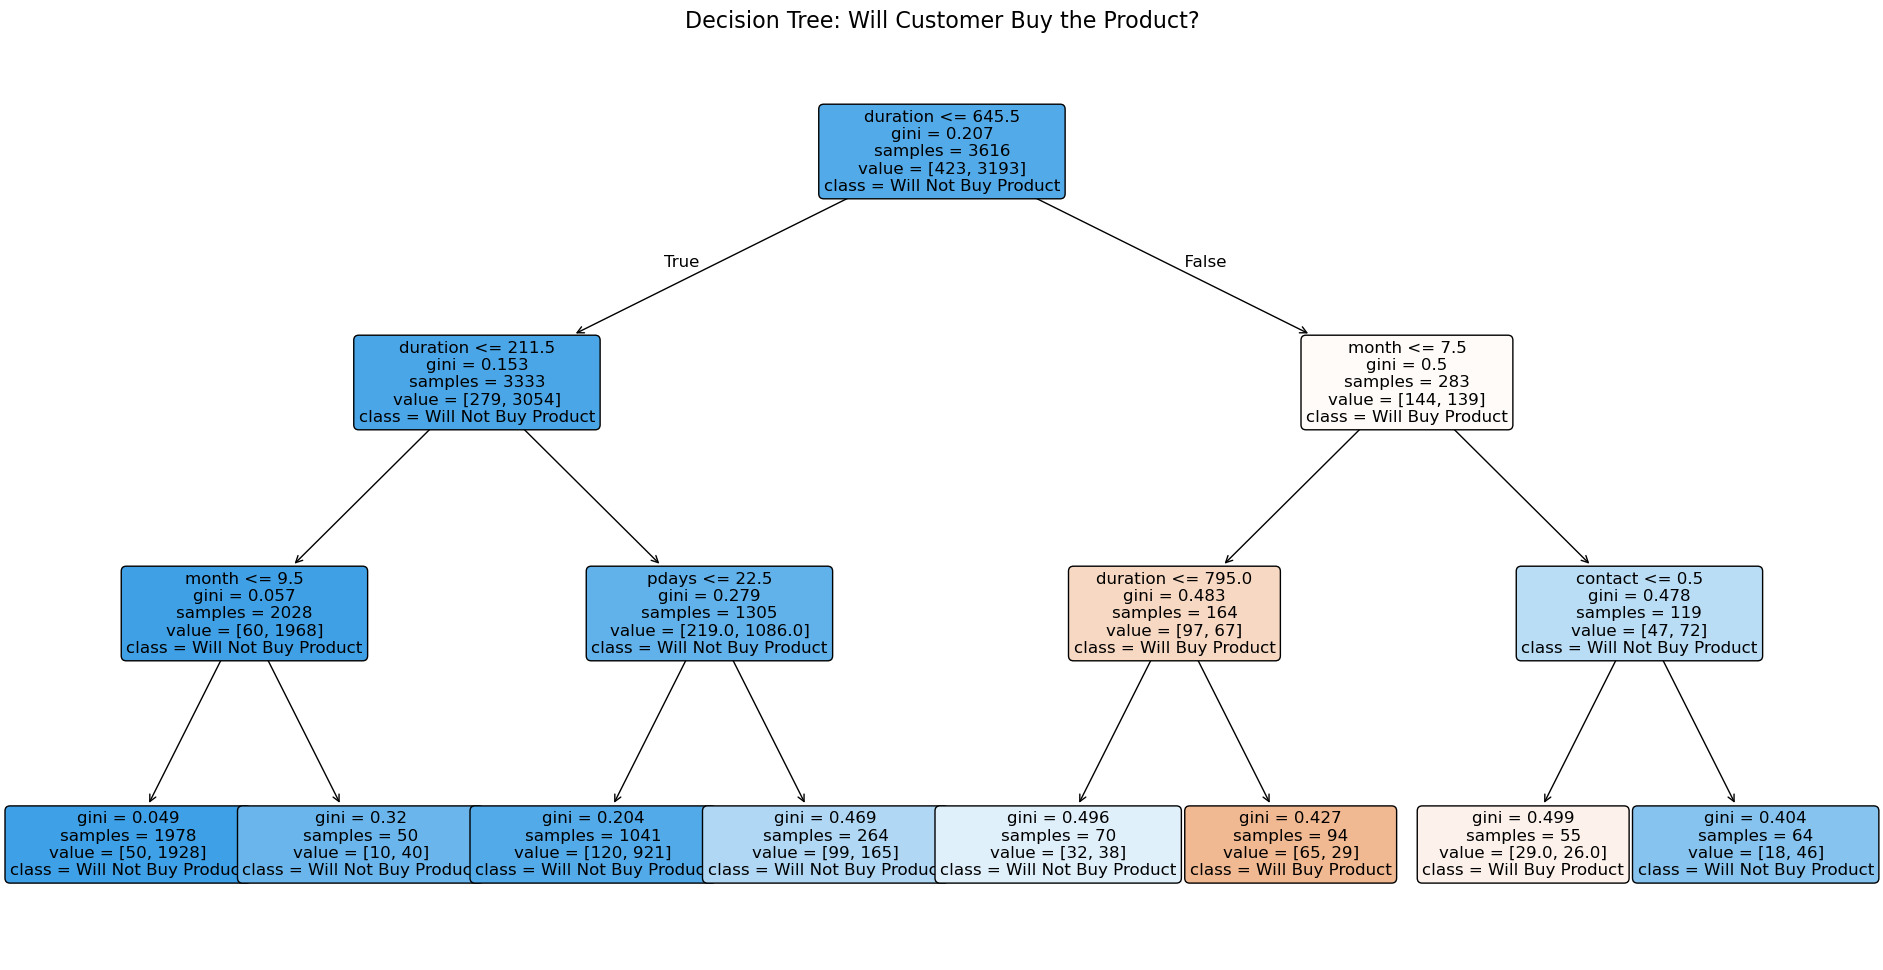

In [18]:
# ✅ Step 8: Visualize Decision Tree
%matplotlib inline
plt.figure(figsize=(24,12))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=le_y.classes_, 
          filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree: Will Customer Buy the Product?", fontsize=16)
plt.show()

In [19]:
# ✅ Step 9: Show Decision Rules (on what basis)
rules = export_text(clf, feature_names=list(X.columns), max_depth=3)
print(rules)

|--- duration <= 645.50
|   |--- duration <= 211.50
|   |   |--- month <= 9.50
|   |   |   |--- class: 1
|   |   |--- month >  9.50
|   |   |   |--- class: 1
|   |--- duration >  211.50
|   |   |--- pdays <= 22.50
|   |   |   |--- class: 1
|   |   |--- pdays >  22.50
|   |   |   |--- class: 1
|--- duration >  645.50
|   |--- month <= 7.50
|   |   |--- duration <= 795.00
|   |   |   |--- class: 1
|   |   |--- duration >  795.00
|   |   |   |--- class: 0
|   |--- month >  7.50
|   |   |--- contact <= 0.50
|   |   |   |--- class: 0
|   |   |--- contact >  0.50
|   |   |   |--- class: 1



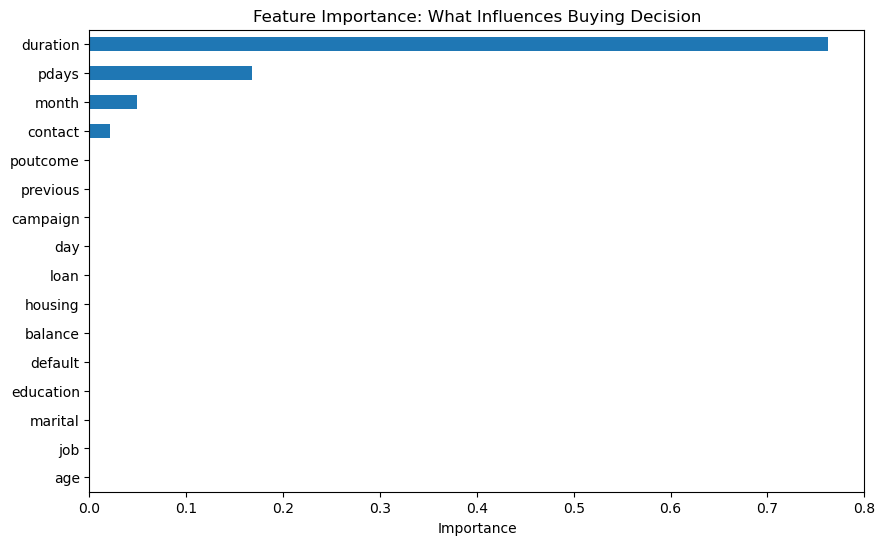

In [20]:
# ✅ Step 10: Show Feature Importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance: What Influences Buying Decision")
plt.xlabel("Importance")
plt.show()